The National Longitudinal Survey of Youth 1997-2011 dataset is one of the most important databases available to social scientists working with US data.

It allows scientists to look at the determinants of earnings as well as educational attainment, ethnicity, sex, and other factors.


### Upgrade Plotly

In [1]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 30.1 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


###  Import Statements


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data



In [5]:
df_raw_data = pd.read_csv('NLSY97_subset.csv')

# Preliminary Data Exploration

* What is the shape of `df_raw_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
df_raw_data.shape

(2000, 96)

In [7]:
df_raw_data.columns

Index(['ID', 'EARNINGS', 'S', 'EXP', 'FEMALE', 'MALE', 'BYEAR', 'AGE',
       'AGEMBTH', 'HHINC97', 'POVRAT97', 'HHBMBF', 'HHBMOF', 'HHOMBF',
       'HHBMONLY', 'HHBFONLY', 'HHOTHER', 'MSA97NO', 'MSA97NCC', 'MSA97CC',
       'MSA97NK', 'ETHBLACK', 'ETHHISP', 'ETHWHITE', 'EDUCPROF', 'EDUCPHD',
       'EDUCMAST', 'EDUCBA', 'EDUCAA', 'EDUCHSD', 'EDUCGED', 'EDUCDO',
       'PRMONM', 'PRMONF', 'PRMSTYUN', 'PRMSTYPE', 'PRMSTYAN', 'PRMSTYAE',
       'PRFSTYUN', 'PRFSTYPE', 'PRFSTYAN', 'PRFSTYAE', 'SINGLE', 'MARRIED',
       'COHABIT', 'OTHSING', 'FAITHN', 'FAITHP', 'FAITHC', 'FAITHJ', 'FAITHO',
       'FAITHM', 'ASVABAR', 'ASVABWK', 'ASVABPC', 'ASVABMK', 'ASVABNO',
       'ASVABCS', 'ASVABC', 'ASVABC4', 'VERBAL', 'ASVABMV', 'HEIGHT',
       'WEIGHT04', 'WEIGHT11', 'SF', 'SM', 'SFR', 'SMR', 'SIBLINGS', 'REG97NE',
       'REG97NC', 'REG97S', 'REG97W', 'RS97RURL', 'RS97URBN', 'RS97UNKN',
       'JOBS', 'HOURS', 'TENURE', 'CATGOV', 'CATPRI', 'CATNPO', 'CATMIS',
       'CATSE', 'COLLBARG', 'URBAN'

Key columns:

S = Years of schooling (highest grade completed as of 2011).
EXP = Total out-of-school work experience (years) as of the 2011 interview.
EARNINGS = Current hourly earnings in $ reported at the 2011 interview.

In [8]:
df_raw_data.head()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
0,4275,18.50,12,9.71,0,1,1984,27,24.00,"64,000.00",...,1,0,0,1,0,0,0,1,0,0
1,4328,19.23,17,5.71,0,1,1982,29,32.00,"6,000.00",...,2,0,0,1,0,0,1,0,0,0
2,8763,39.05,14,9.94,0,1,1981,30,23.00,"88,252.00",...,1,0,0,0,1,0,0,1,0,0
3,8879,16.80,18,1.54,0,1,1983,28,30.00,NaN,...,1,0,1,0,0,0,1,0,0,0
4,1994,36.06,15,2.94,0,1,1984,27,23.00,"44,188.00",...,1,0,0,0,1,0,0,1,0,0


## Check for Missing Values and Duplicates

In [9]:
df_clean_data = df_raw_data.drop_duplicates()
df_clean_data.shape

(1487, 96)

## Descriptive Statistics

In [10]:
# Return basic descriptive statistics
df_clean_data.describe()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
count,"1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,453.00","1,205.00",...,"1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00"
mean,"3,547.13",18.81,14.56,6.70,0.49,0.51,"1,982.07",28.93,26.32,"58,310.67",...,0.78,0.16,0.27,0.34,0.23,0.05,0.54,0.41,0.00,0.00
std,"2,009.84",12.00,2.77,2.86,0.50,0.50,1.38,1.38,5.08,"43,868.05",...,0.43,0.36,0.44,0.47,0.42,0.21,0.50,0.49,0.04,0.00
min,1.00,2.00,6.00,0.00,0.00,0.00,"1,980.00",27.00,12.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,888.00",11.41,12.00,4.65,0.00,0.00,"1,981.00",28.00,23.00,"32,000.00",...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"3,474.00",15.75,15.00,6.63,0.00,1.00,"1,982.00",29.00,26.00,"50,500.00",...,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
75%,"5,160.50",22.60,16.00,8.71,1.00,1.00,"1,983.00",30.00,30.00,"72,000.00",...,1.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00
max,"8,980.00",132.89,20.00,14.73,1.00,1.00,"1,984.00",31.00,45.00,"246,474.00",...,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00


# Visualise the Features

In [11]:
# Earnings by years of schooling
# Group data by years of schooling
df_earnings_by_schooling = df_clean_data.groupby("S")["EARNINGS"].mean()

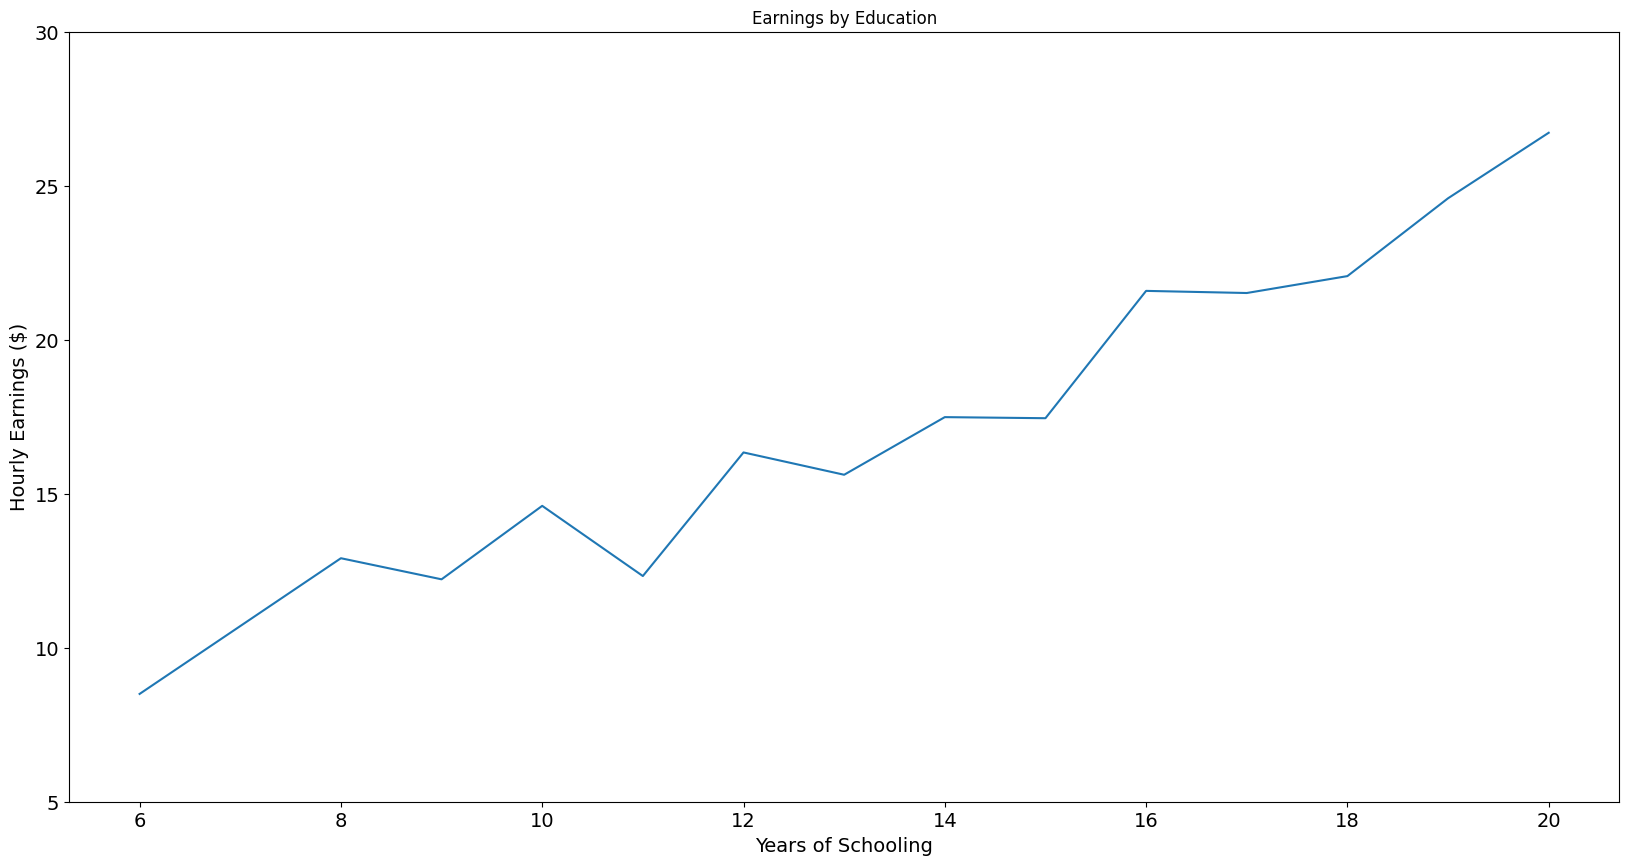

In [12]:
plt.figure(figsize=(20,10))
plt.title("Earnings by Education")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Years of Schooling", fontsize=14)
plt.ylabel("Hourly Earnings ($)", fontsize=14)
plt.ylim(5,30)
plt.plot(df_earnings_by_schooling.index, df_earnings_by_schooling.to_list())

Unsurprisingly, earnings and education have a positive correlation.

In [13]:
# Earnings by years of work experience
# Perform floor division to express all the different levels of work experience as whole years.
df_clean_data["EXP_FLOORED"] = df_clean_data["EXP"] // 1

<ipython-input-13-db709c1a926c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_data["EXP_FLOORED"] = df_clean_data["EXP"] // 1


In [14]:
# Group data by years of work exp
df_earnings_by_exp = df_clean_data.groupby("EXP_FLOORED")["EARNINGS"].mean()
print(df_earnings_by_exp)

EXP_FLOORED
0.00    14.61
1.00    18.93
2.00    18.94
3.00    20.09
4.00    19.14
5.00    19.65
6.00    18.03
7.00    19.29
8.00    19.29
9.00    17.28
10.00   19.52
11.00   17.57
12.00   16.35
13.00   19.60
14.00   20.05
Name: EARNINGS, dtype: float64


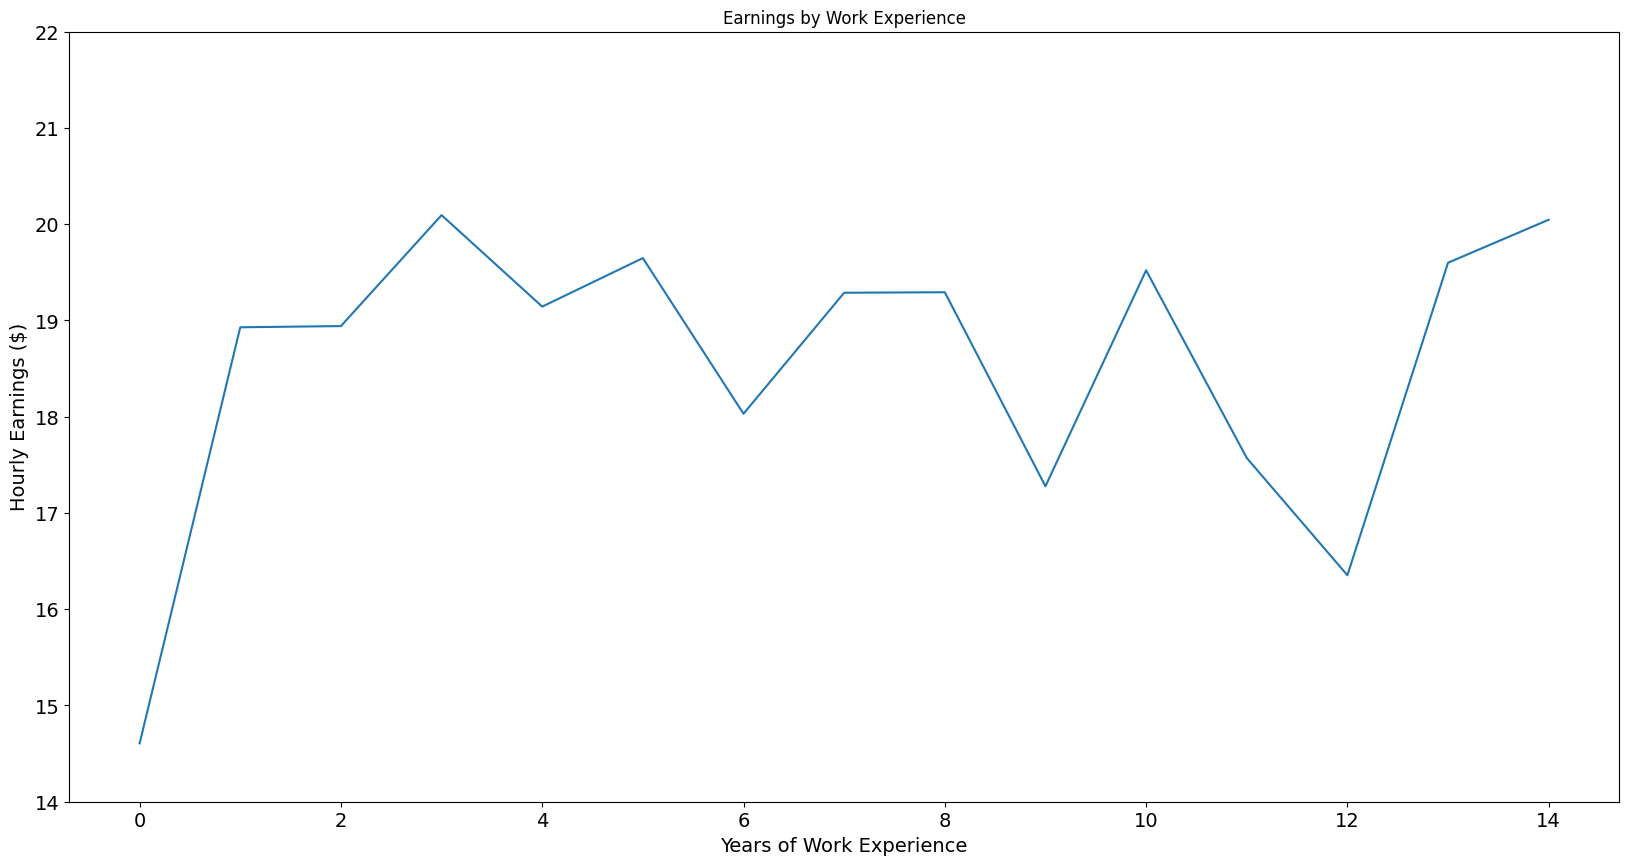

In [15]:
plt.figure(figsize=(20,10))
plt.title("Earnings by Work Experience")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Years of Work Experience", fontsize=14)
plt.ylabel("Hourly Earnings ($)", fontsize=14)
plt.ylim(14,22)
plt.plot(df_earnings_by_exp.index, df_earnings_by_exp.to_list())

One would expect a very clearl positive correlation between earnings and work experience.

There is an overall postive trend when taken from 0 to 14 years, but it is anything but smooth - the two highest points are 14 years and 3 years!

# Split Training & Test Dataset

This is done because a very common issue when training a model is overfitting This phenomenon occurs when a model performs really well on the data that we used to train it but it fails to generalise well to new, unseen data points.

There are numerous reasons why this can happen — it could be due to the noise in data or it could be that the model learned to predict specific inputs rather than the predictive parameters that could help it make correct predictions.

Typically, the higher the complexity of a model the higher the chance that it will be overfitted.

In [16]:
# Use 80% of data as training set, use remaining 20% as test data set.
(train, test) = train_test_split(df_clean_data, test_size=0.2)

# Simple Linear Regression

Here I use the years of schooling to predict earnings.

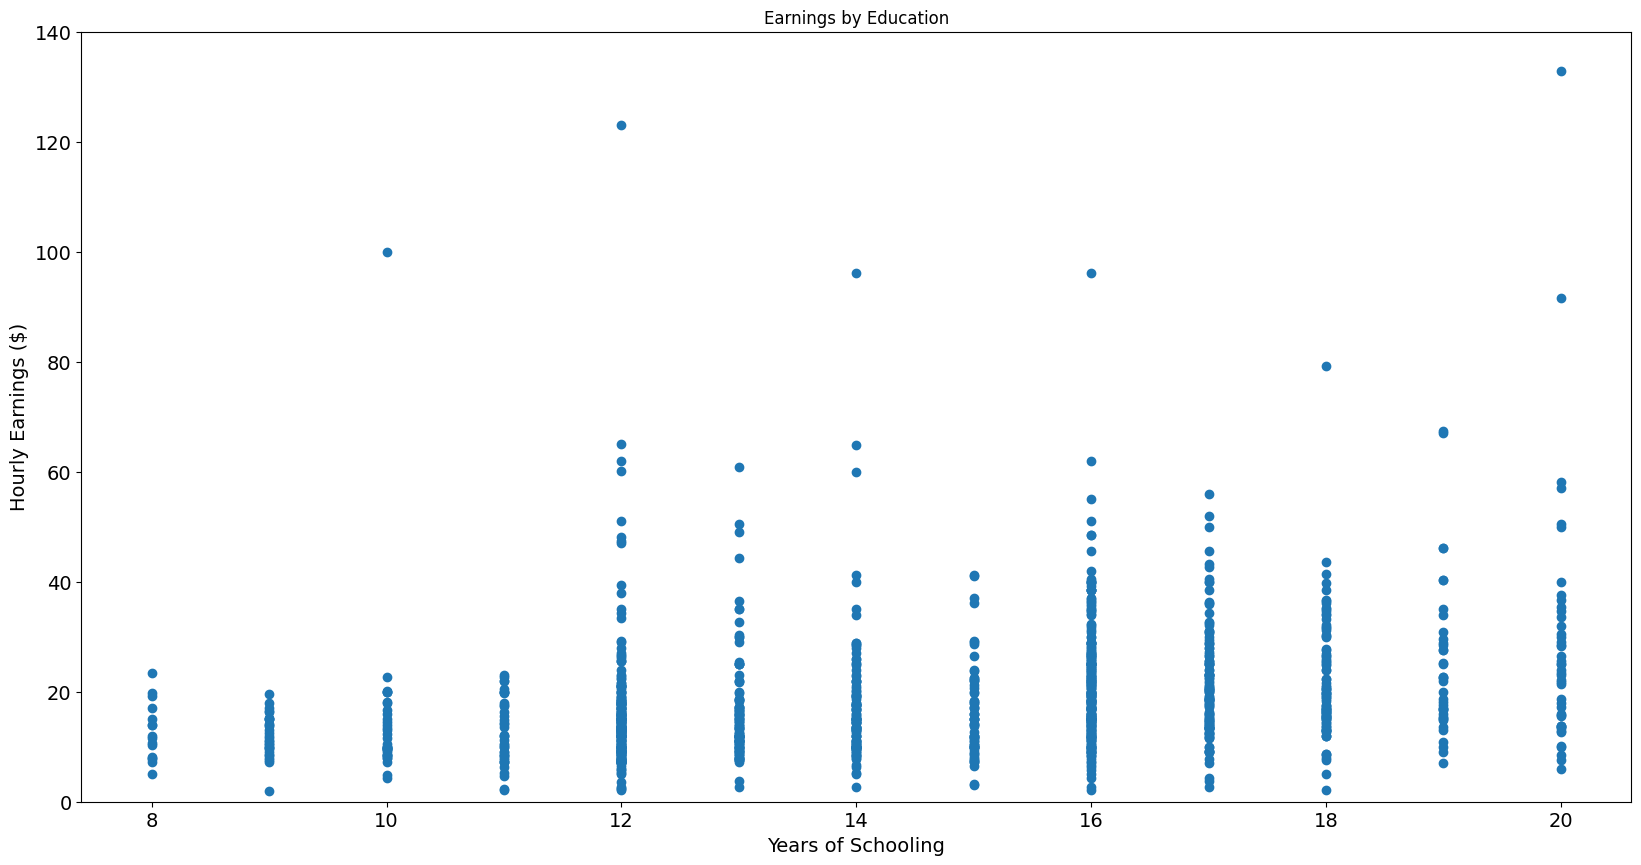

In [17]:
plt.figure(figsize=(20,10))
plt.title("Earnings by Education")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Years of Schooling", fontsize=14)
plt.ylabel("Hourly Earnings ($)", fontsize=14)
plt.ylim(0,140)
plt.scatter(train.S, train.EARNINGS)

In [18]:
# Divide test and train data into attributes and labels.
# Attributes are the independent variables, while lables are the dependent variables.
X_train = train["S"].values.reshape(-1,1)
y_train = train["EARNINGS"].values.reshape(-1,1)

X_test = test["S"].values.reshape(-1,1)
y_test = test["EARNINGS"].values.reshape(-1,1)

In [19]:
# Create linear regression class
regr1 = LinearRegression()

In [20]:
# Call fit() method along with training data in order to train the algorithm.
regr1.fit(X_train, y_train)

LinearRegression()

In [21]:
# Find  R-squared value.
# This represents the goodness of fit of the model.
regr1.score(X_train, y_train)

0.08610316226814863

An R-squared value of ~0.07 means that the model explains 7% of the variation within the data.

A low value like this is about what you would expect, considering we've got the simplest possible model, with only one explanatory variable.

### Evaluate the Coefficients of the Model

In [22]:
# Gradient of line of best fit, aka "Regression coefficient"
regr1.coef_

array([[1.26667248]])

It's reassuring to see that the gradient is positive at the very least!

This means that for every 1 year increase in education, the increase in earnings is about 1.2 $/hr.

### Analyse the Estimated Values & Regression Residuals

How good our regression is also depends on the residuals - the difference between the model's predictions and the true values inside y_train.

In [24]:
y_predicted = regr1.predict(X_test)

In [25]:
df_predicted_vs_actual = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})

<Axes: title={'center': 'Predicted Earnings vs Actual Earnings'}, xlabel='Sample Data Point ID', ylabel='Hourly Earnigns ($)'>

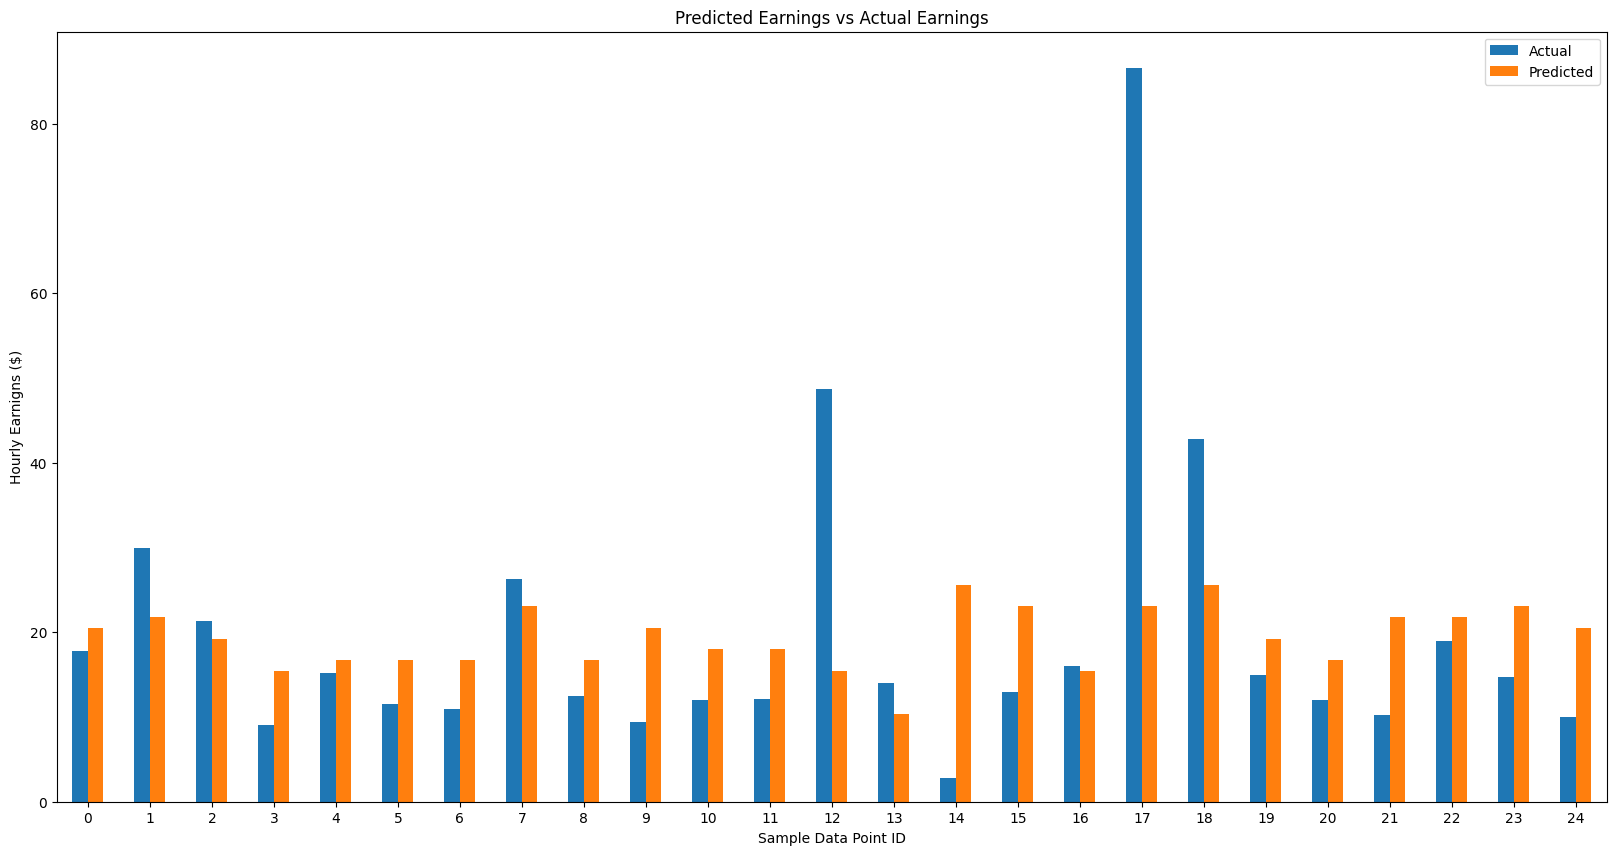

In [26]:
# As the number of records is huge, for representation purposes take 25 records
df1 = df_predicted_vs_actual.head(25)
df1.plot(
    kind='bar',
    figsize=(20,10),
    title="Predicted Earnings vs Actual Earnings",
    xlabel="Sample Data Point ID",
    ylabel="Hourly Earnigns ($)",
    rot=0
    )

It can be seen that the model is not very precise, however there is at least a weak correlation between the estimated and the predicted values.

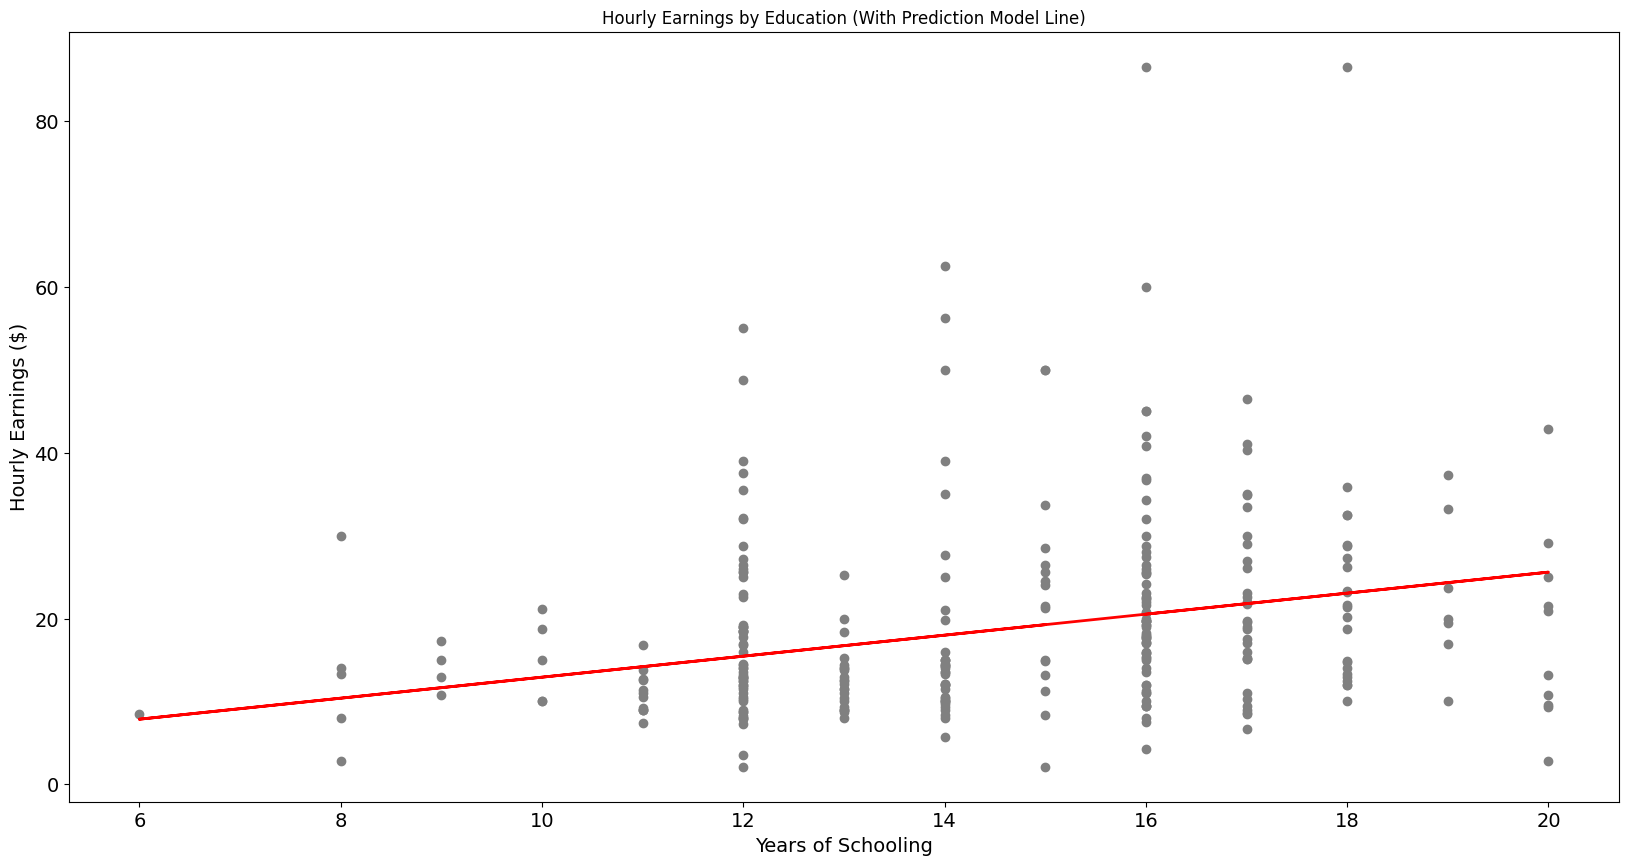

In [27]:
plt.figure(figsize=(20,10))
plt.title("Hourly Earnings by Education (With Prediction Model Line)")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Years of Schooling", fontsize=14)
plt.ylabel("Hourly Earnings ($)", fontsize=14)

plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_predicted, color='red', linewidth=2)

In [28]:
# Add residual column to "df"
df_predicted_vs_actual["Residual"] = df_predicted_vs_actual["Actual"] - df_predicted_vs_actual["Predicted"]

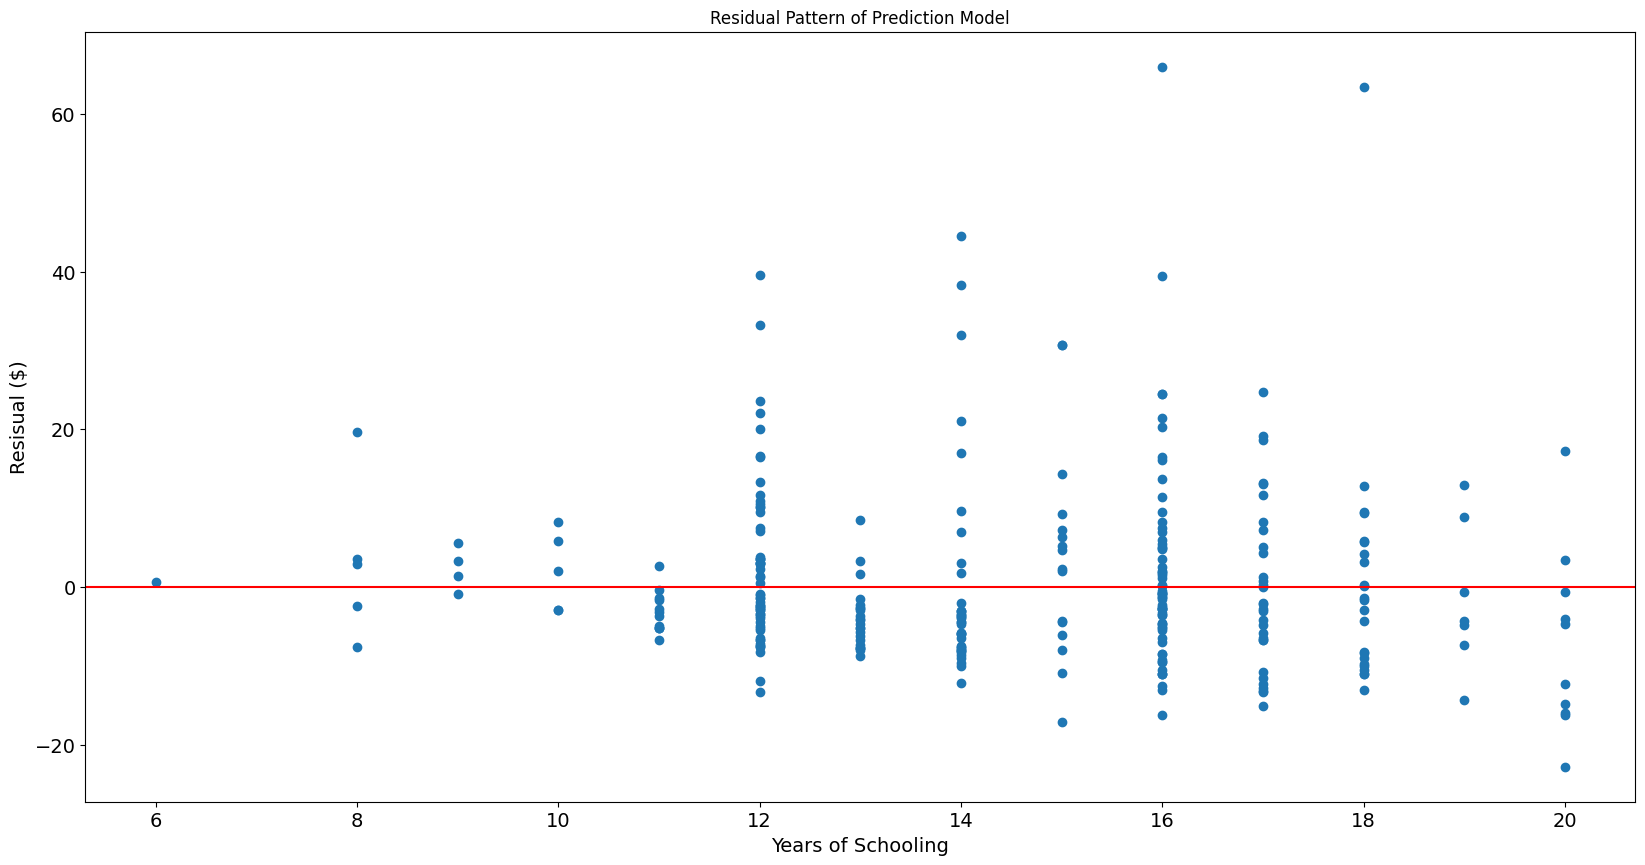

In [29]:
plt.figure(figsize=(20,10))
plt.title("Residual Pattern of Prediction Model")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Years of Schooling", fontsize=14)
plt.ylabel("Resisual ($)", fontsize=14)
plt.scatter(X_test, df_predicted_vs_actual.Residual)
plt.axhline(y = 0.0, color = 'r', linestyle = '-')

As mentioned before, a residual is a measure of how far away a point is vertically from the regression line. Simply, it is the error between a predicted value and the observed actual value.

It is not a strong correlation, but as the the years of schooling and thus the earnings increase, the residual spread generally gets larger.

# Multivariable Regression

Now I use both years of schooling and the years work experience to predict earnings.

In [30]:
# Our dependent variable is still earnings so no change.
# However, we are now including "EXP" as an additional independent variable.
X_train2 = train[["S","EXP"]].values
X_test2 = test[["S","EXP"]].values

In [31]:
regr2 = LinearRegression()
regr2.fit(X_train2, y_train)

LinearRegression()

### Evaluate the Coefficients of the Model

In [32]:
regr2.score(X_train2, y_train)

0.11420985043805487

Our R-squared value has increased from ~0.07 to ~0.1 which means that the addition of the new variable has cause our model to explain more of the variation in earnings

In [33]:
regr2.coef_

array([[1.78226483, 0.86152976]])

### Analyse the Estimated Values

In [34]:
y_predicted2 = regr2.predict(X_test2)

In [35]:
df_predicted_vs_actual_multivariate = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted2.flatten()})

<Axes: title={'center': 'Predicted Earnings vs Actual Earnings'}, xlabel='Sample Data Point ID', ylabel='Hourly Earnigns ($)'>

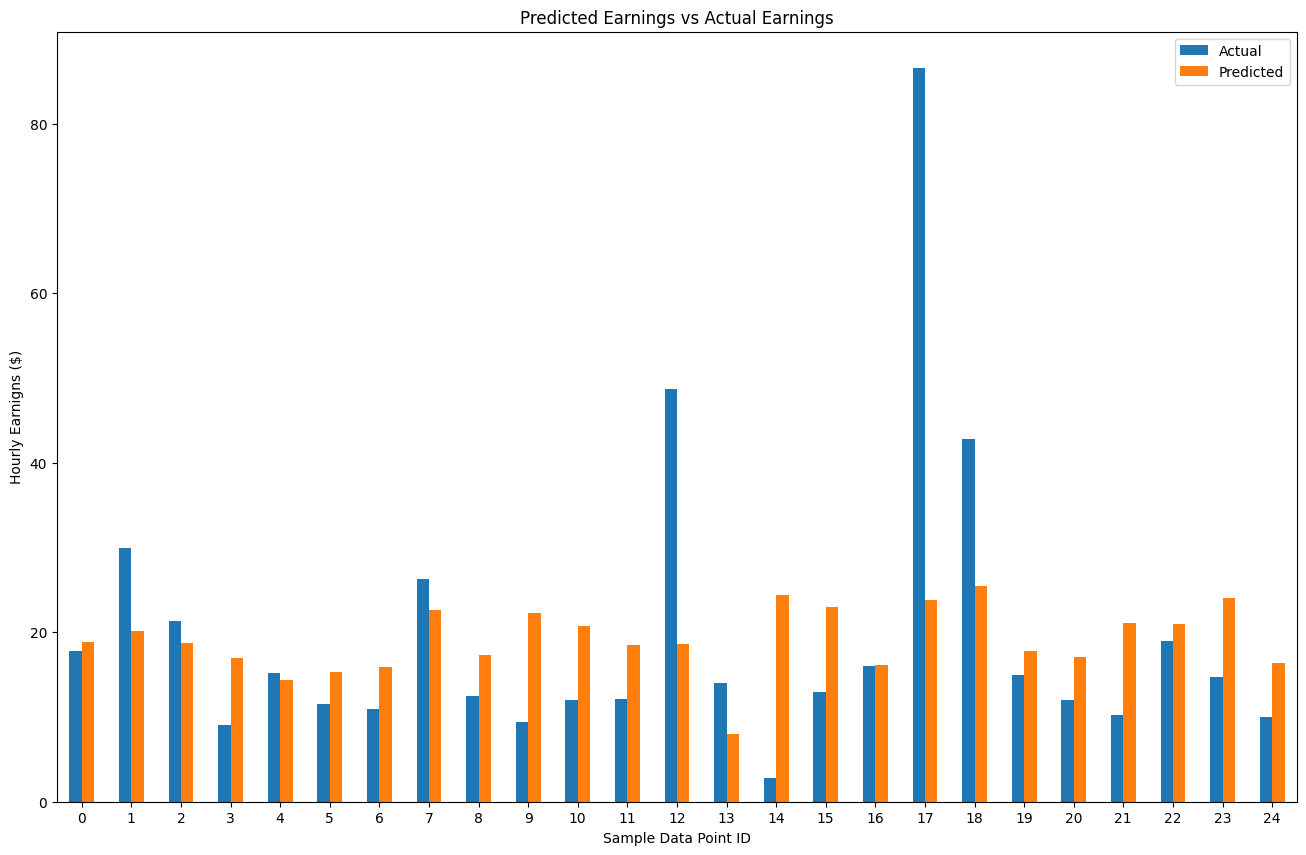

In [36]:
# As the number of records is huge, for representation purposes take 25 records
df2 = df_predicted_vs_actual_multivariate.head(25)
df2.plot(
    kind='bar',
    figsize=(16,10),
    title="Predicted Earnings vs Actual Earnings",
    xlabel="Sample Data Point ID",
    ylabel="Hourly Earnigns ($)",
    rot=0
    )

It can be seen while the model is still not very precise, the addition of the new variable cause improved it slightly - the actual values are slightly closer to the predicted values as a whole.

# Using the Model to Make a Prediction

How much can someone with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn in 2011?

In [37]:
regr2.predict([[16, 5]])

array([[19.78605684]])

The model predicts that someone with 16 years of schooling and 5 years of work experience would earn roughly $19.88/hr in the USA in 2011

This model can still be improved by adding more variables.

Other factors that I expect to have a large impact on earnings and thus would improve the model include things like: gender, race, parental presence, socio-economic status, geographic area.